Using MPI version 3.1, 1 processes
-----------
Initializing structure...
time for choose_chunkdivision = 0.000198048 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10,10,10)
time for set_epsilon = 0.0675591 s
-----------
run 0 finished at t = 100.0 (4000 timesteps)


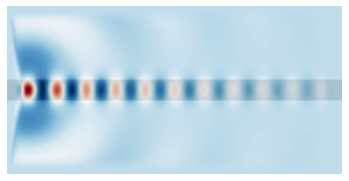

In [1]:
# From the Meep tutorial: plotting permittivity and fields of a straight waveguide
import sys
sys.modules['ipywidgets'] = None # cripple FloatProgress error from ipywidgets. If I can't use it, no one else can
import meep as mp


cell = mp.Vector3(16, 8, 0)

geometry = [
    mp.Block(
        size=mp.Vector3(mp.inf, 1, mp.inf),
        center=mp.Vector3(),
        material=mp.Medium(epsilon=10,chi3=0),
    )
]
sources = [
    mp.Source(
        mp.GaussianSource(frequency=0.25,fwidth=.01), component=mp.Ez, center=mp.Vector3(-7, 0)
    )
]

pml_layers = [mp.PML(1.0)]

resolution = 20

sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
)

# sim.run(until=200)
sim.run(until=100)

import matplotlib.pyplot as plt
import numpy as np

eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
# plt.figure()
# plt.imshow(eps_data.transpose(), interpolation="spline36", cmap="binary")
# plt.axis("off")
# plt.show()

ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation="spline36", cmap="binary")
plt.imshow(ez_data.transpose(), interpolation="spline36", cmap="RdBu", alpha=0.9)
plt.axis("off")
plt.show()

In [2]:
cell = mp.Vector3(16, 8, 0)

In [3]:
geometry = [
    mp.Block(
        mp.Vector3(mp.inf, 1, mp.inf),
        center=mp.Vector3(),
        material=mp.Medium(epsilon=12),
    )
]

In [4]:
sources = [
    mp.Source(
        mp.ContinuousSource(frequency=0.15), component=mp.Ez, center=mp.Vector3(-7, 0)
    )
]

In [5]:
pml_layers = [mp.PML(1.0)]

In [6]:
resolution = 10

In [7]:
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000317901 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.022055 s
-----------


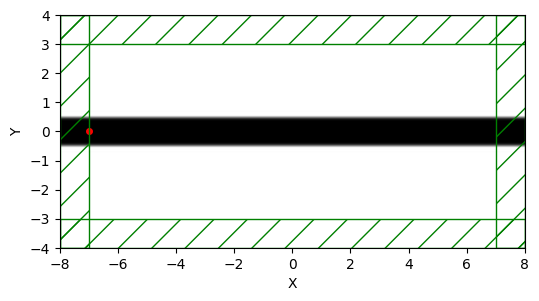

In [8]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()

In [9]:
sim.run(until=200)

run 0 finished at t = 200.0 (4000 timesteps)


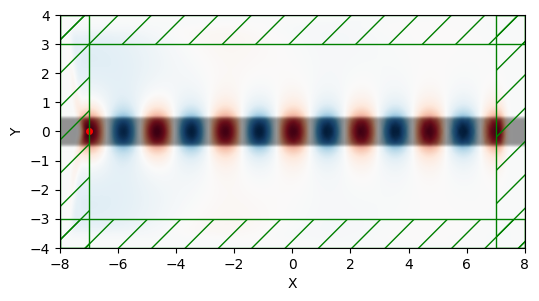

In [10]:
plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [11]:
sim.reset_meep()
f = plt.figure(dpi=100)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True,sim=sim)
plt.close()

In [12]:
sim.run(mp.at_every(1, Animate), until=100)
plt.close()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000303958 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0233684 s
-----------
Normalizing field data...
run 1 finished at t = 100.0 (2000 timesteps)


In [13]:
filename = "media/straight_waveguide.gif"
Animate.to_gif(10, filename)

Generating GIF...


BrokenPipeError: [Errno 32] Broken pipe

In [18]:
from IPython.display import Video

Video(filename)

ValueError: To embed videos, you must pass embed=True (this may make your notebook files huge)
Consider passing Video(url='...')